In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('amazon_prime_users.csv',header = 0)
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [5]:
data_ratings = data['Feedback/Ratings'].groupby(data['Gender'])
data_ratings = data_ratings.value_counts().to_dict()
data_ratings

{('Female', 3.9): 82,
 ('Female', 3.8): 74,
 ('Female', 3.1): 69,
 ('Female', 4.1): 69,
 ('Female', 4.4): 69,
 ('Female', 4.3): 68,
 ('Female', 4.7): 67,
 ('Female', 4.5): 65,
 ('Female', 3.5): 63,
 ('Female', 4.6): 62,
 ('Female', 3.7): 59,
 ('Female', 3.2): 58,
 ('Female', 4.0): 57,
 ('Female', 4.8): 57,
 ('Female', 3.3): 54,
 ('Female', 3.4): 53,
 ('Female', 4.2): 53,
 ('Female', 4.9): 52,
 ('Female', 3.6): 50,
 ('Female', 3.0): 31,
 ('Female', 5.0): 28,
 ('Male', 4.3): 76,
 ('Male', 4.9): 76,
 ('Male', 3.1): 74,
 ('Male', 3.5): 72,
 ('Male', 3.8): 68,
 ('Male', 3.6): 65,
 ('Male', 4.6): 65,
 ('Male', 4.8): 65,
 ('Male', 4.5): 64,
 ('Male', 4.2): 63,
 ('Male', 4.1): 62,
 ('Male', 3.3): 57,
 ('Male', 4.0): 57,
 ('Male', 4.7): 57,
 ('Male', 3.9): 56,
 ('Male', 3.2): 54,
 ('Male', 3.7): 53,
 ('Male', 3.4): 52,
 ('Male', 4.4): 47,
 ('Male', 3.0): 40,
 ('Male', 5.0): 37}

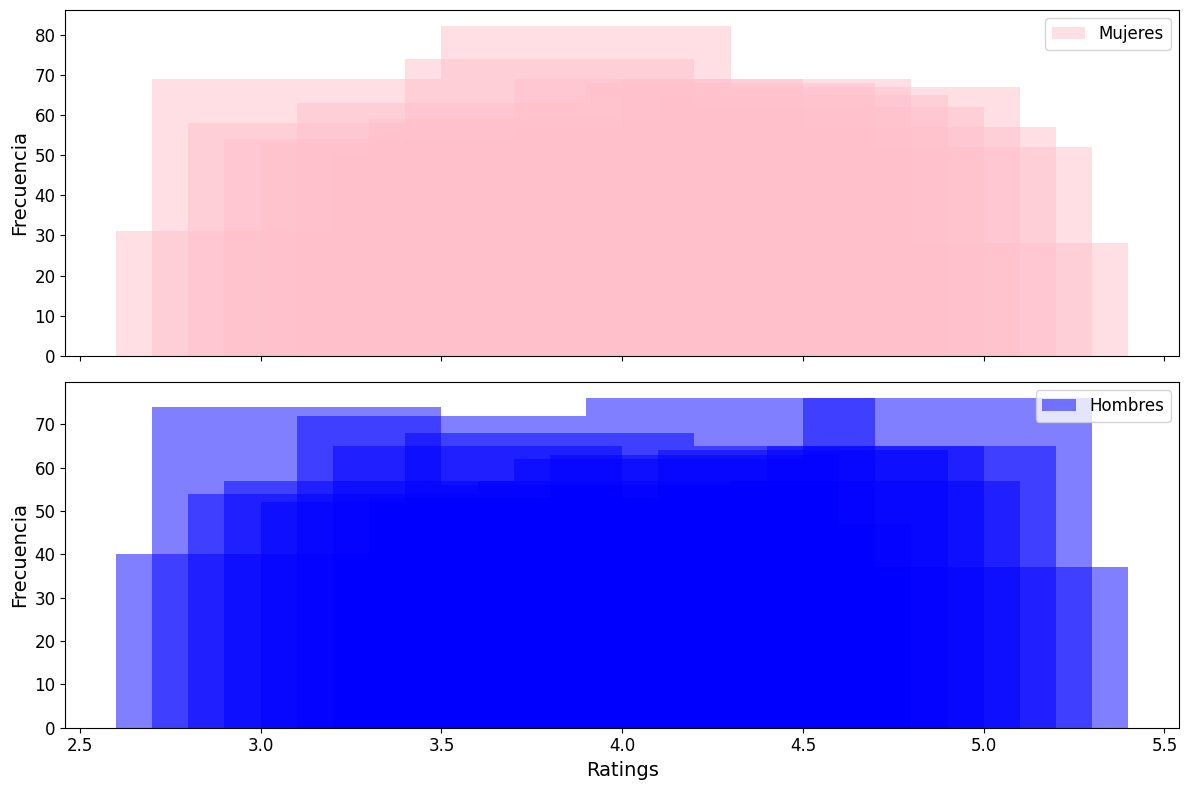

In [16]:
data1 = {key[1]:value for key,value in data_ratings.items() if key[0] == 'Female'}
data2 = {key[1]:value for key,value in data_ratings.items() if key[0] == 'Male'}

fig_width = 12
fig_height = 8

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width, fig_height), sharex=True)

ax1.bar(data1.keys(), data1.values(), color='pink', alpha=0.5, label='Mujeres')
ax2.bar(data2.keys(), data2.values(), color='blue', alpha=0.5, label='Hombres')

label_fontsize = 14
title_fontsize = 16
legend_fontsize = 12
ticks_fontsize = 12

ax1.set_ylabel('Frecuencia', fontsize=label_fontsize)

ax2.set_xlabel('Ratings', fontsize=label_fontsize)
ax2.set_ylabel('Frecuencia', fontsize=label_fontsize)


ax1.legend(fontsize=legend_fontsize)
ax2.legend(fontsize=legend_fontsize)

ax1.tick_params(axis='x', labelsize=ticks_fontsize)
ax1.tick_params(axis='y', labelsize=ticks_fontsize)
ax2.tick_params(axis='x', labelsize=ticks_fontsize)
ax2.tick_params(axis='y', labelsize=ticks_fontsize)

plt.tight_layout()

fig.patch.set_alpha(0.0)
ax1.patch.set_alpha(0.0)
ax2.patch.set_alpha(0.0)

plt.savefig('distributions_ratings.svg', format='svg', transparent=True)

plt.show()

In [7]:
data_products = data['Purchase History'].groupby(data['Gender'])
data_products = data_products.value_counts().to_dict()
data_products

{('Female', 'Electronics'): 429,
 ('Female', 'Books'): 410,
 ('Female', 'Clothing'): 401,
 ('Male', 'Books'): 441,
 ('Male', 'Electronics'): 418,
 ('Male', 'Clothing'): 401}

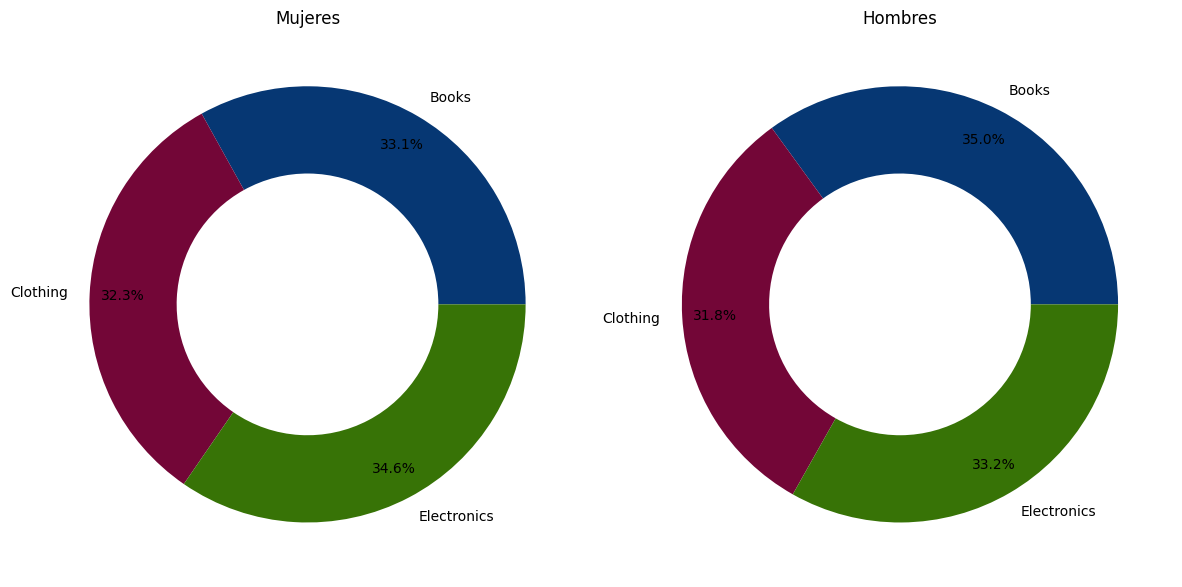

In [20]:
data1 = {key[1]:value for key,value in sorted(data_products.items()) if key[0] == 'Female'}
data2 = {key[1]:value for key,value in sorted(data_products.items()) if key[0] == 'Male'}

fig_width = 12
fig_height = 8

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(fig_width, fig_height), sharex=True)

ax1.pie(data1.values(),labels = data1.keys(),autopct='%1.1f%%', colors=['#063773','#730637','#377306'],wedgeprops=dict(width=0.4), pctdistance=0.85)
ax2.pie(data2.values(),labels = data2.keys(),autopct='%1.1f%%', colors=['#063773','#730637','#377306'],wedgeprops=dict(width=0.4), pctdistance=0.85)

ax1.set_title('Mujeres')
ax2.set_title('Hombres')

plt.tight_layout()

fig.patch.set_alpha(0.0)
ax1.patch.set_alpha(0.0)
ax2.patch.set_alpha(0.0)

plt.savefig('distributions_products.svg', format='svg', transparent=True)

plt.show()

In [22]:
data_calls = data['Customer Support Interactions'].groupby(data['Gender'])
data_calls = data_calls.value_counts().to_dict()
data_calls

{('Female', 5): 130,
 ('Female', 1): 118,
 ('Female', 3): 114,
 ('Female', 4): 114,
 ('Female', 0): 113,
 ('Female', 6): 113,
 ('Female', 2): 112,
 ('Female', 10): 109,
 ('Female', 9): 107,
 ('Female', 8): 106,
 ('Female', 7): 104,
 ('Male', 10): 127,
 ('Male', 0): 125,
 ('Male', 1): 123,
 ('Male', 2): 119,
 ('Male', 8): 119,
 ('Male', 7): 114,
 ('Male', 4): 111,
 ('Male', 9): 110,
 ('Male', 6): 109,
 ('Male', 5): 102,
 ('Male', 3): 101}

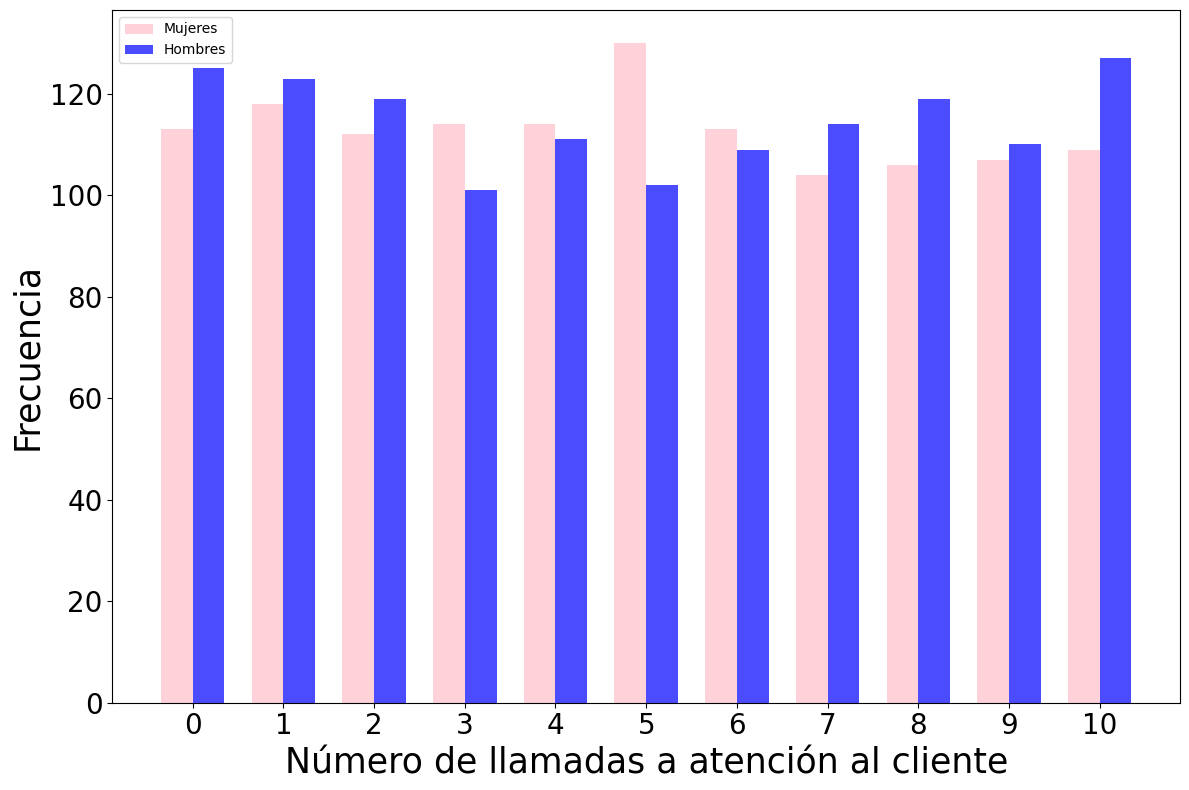

In [28]:
data1 = {key[1]:value for key,value in sorted(data_calls.items()) if key[0] == 'Female'}
data2 = {key[1]:value for key,value in sorted(data_calls.items()) if key[0] == 'Male'}

fig_width = 12
fig_height = 8

label_fontsize = 25
title_fontsize = 16
legend_fontsize = 12
ticks_fontsize = 20

keys = list(data1.keys())
values1 = list(data1.values())
values2 = list(data2.values())

bar_width = 0.35
indices = np.arange(len(keys))

plt.figure(figsize=(12, 8))

plt.bar(indices, values1, bar_width, label='Mujeres', color='pink', alpha=0.7)
plt.bar(indices + bar_width, values2, bar_width, label='Hombres', color='blue', alpha=0.7)

plt.tick_params(axis='x', labelsize=ticks_fontsize)
plt.tick_params(axis='y', labelsize=ticks_fontsize)

plt.xlabel('Número de llamadas a atención al cliente', fontsize=label_fontsize)
plt.ylabel('Frecuencia', fontsize=label_fontsize)
plt.xticks(indices + bar_width / 2, keys)
plt.legend()

plt.tight_layout()


plt.savefig('distributions_calls.svg', format='svg', transparent=True)
plt.show()

In [29]:
data_usage = data['Usage Frequency'].groupby(data['Gender'])
data_usage = data_usage.value_counts().to_dict()
data_usage

{('Female', 'Frequent'): 428,
 ('Female', 'Occasional'): 409,
 ('Female', 'Regular'): 403,
 ('Male', 'Regular'): 424,
 ('Male', 'Frequent'): 423,
 ('Male', 'Occasional'): 413}

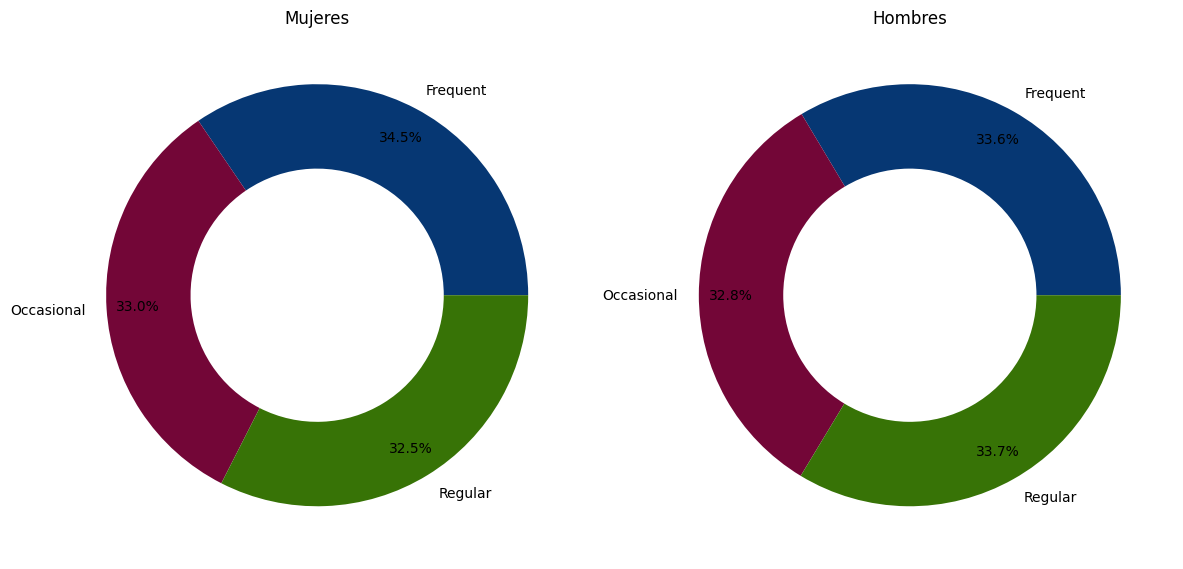

In [30]:
data1 = {key[1]:value for key,value in sorted(data_usage.items()) if key[0] == 'Female'}
data2 = {key[1]:value for key,value in sorted(data_usage.items()) if key[0] == 'Male'}

fig_width = 12
fig_height = 8

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(fig_width, fig_height), sharex=True)

ax1.pie(data1.values(),labels = data1.keys(),autopct='%1.1f%%', colors=['#063773','#730637','#377306'],wedgeprops=dict(width=0.4), pctdistance=0.85)
ax2.pie(data2.values(),labels = data2.keys(),autopct='%1.1f%%', colors=['#063773','#730637','#377306'],wedgeprops=dict(width=0.4), pctdistance=0.85)

ax1.set_title('Mujeres')
ax2.set_title('Hombres')

plt.tight_layout()

fig.patch.set_alpha(0.0)
ax1.patch.set_alpha(0.0)
ax2.patch.set_alpha(0.0)

plt.savefig('distributions_usage.svg', format='svg', transparent=True)